In [2]:
import pandas as pd

fem_act = pd.read_csv('/Users/evelynzhang/Documents/GitHub/MiceActivityAcrossTime/data/Mouse_Fem_Act.csv')
fem_temp = pd.read_csv('/Users/evelynzhang/Documents/GitHub/MiceActivityAcrossTime/data/Mouse_Fem_Temp.csv')
male_act = pd.read_csv('/Users/evelynzhang/Documents/GitHub/MiceActivityAcrossTime/data/Mouse_Male_Act.csv')
male_temp = pd.read_csv('/Users/evelynzhang/Documents/GitHub/MiceActivityAcrossTime/data/Mouse_Male_Temp.csv')

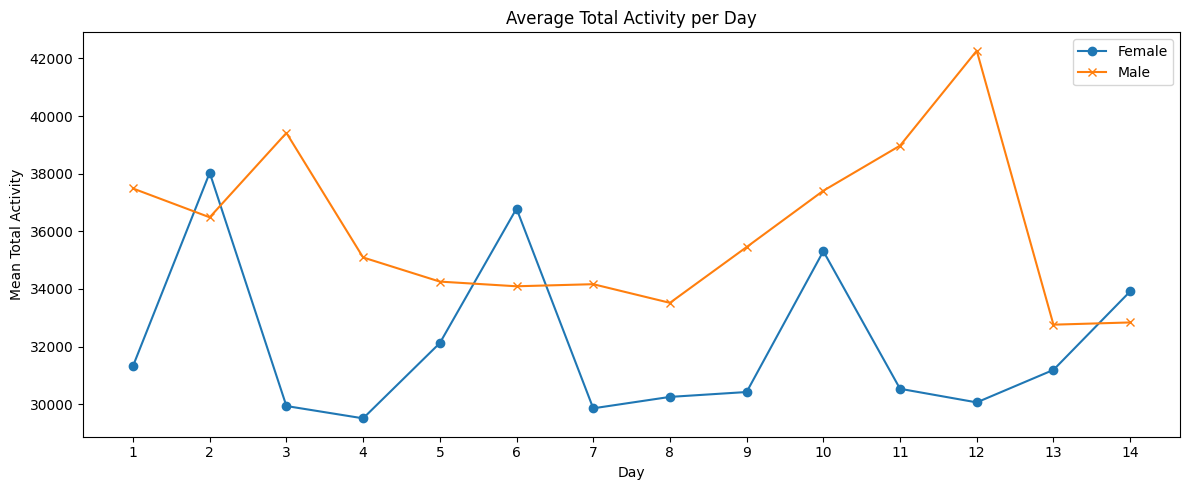

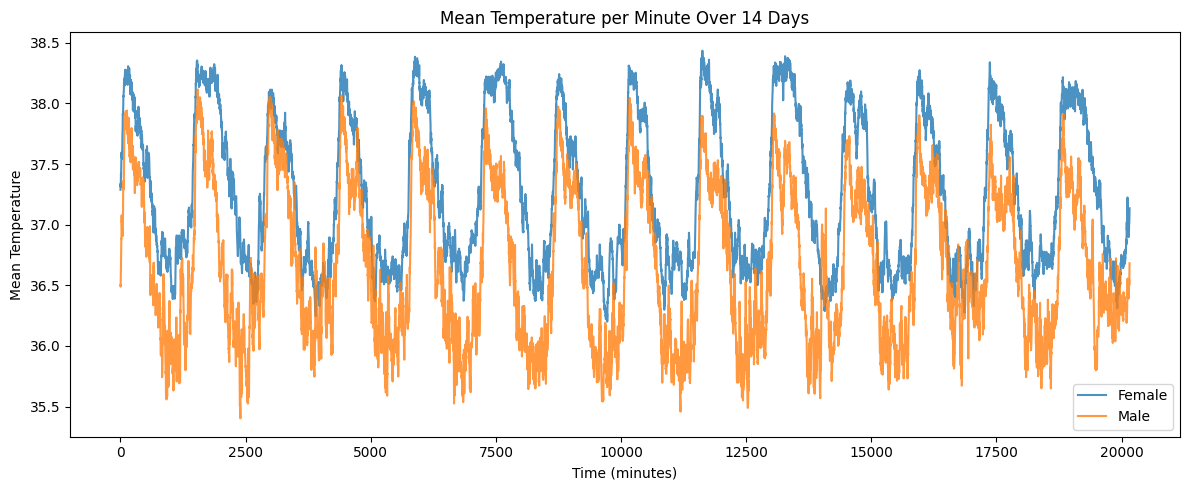

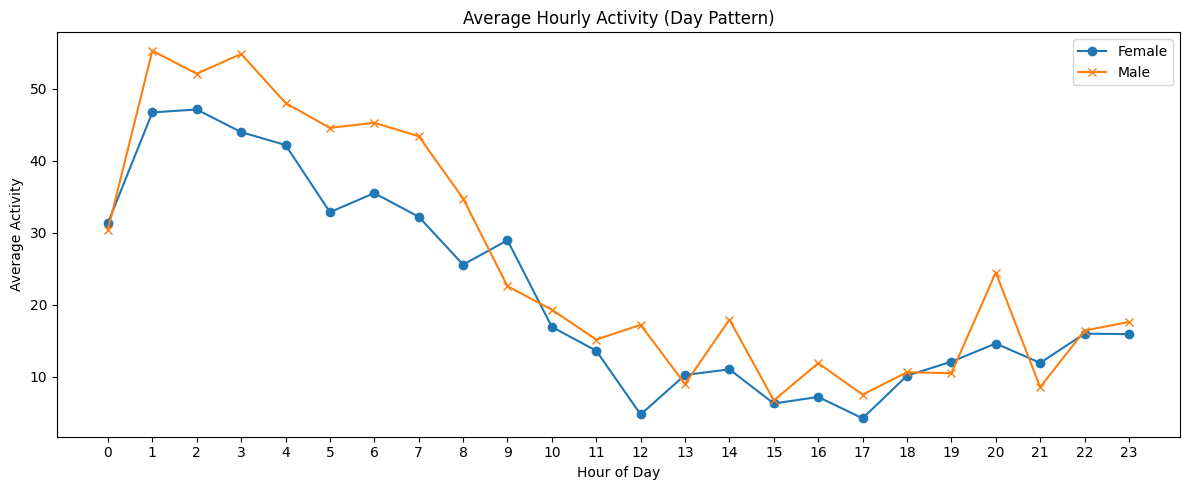

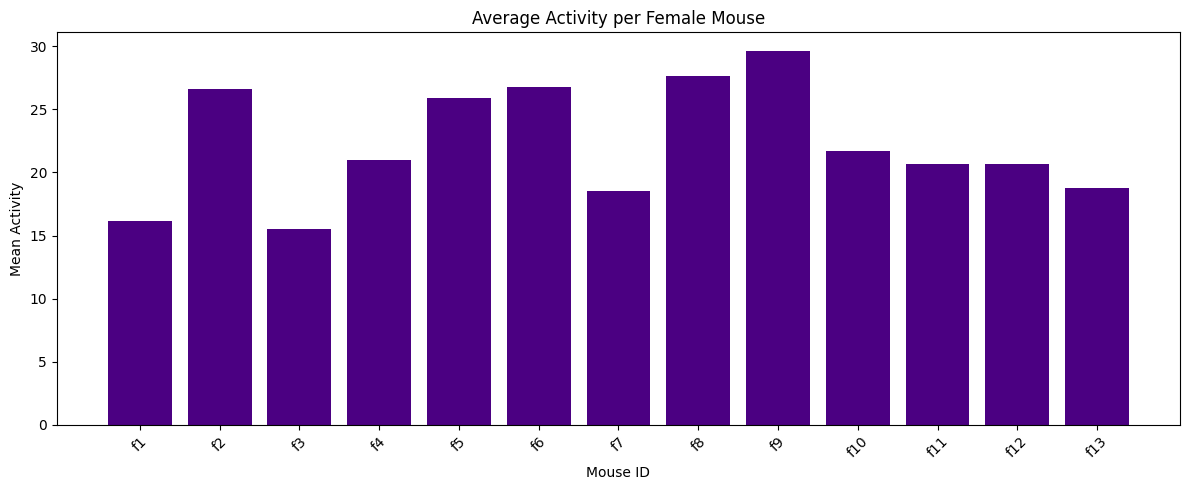

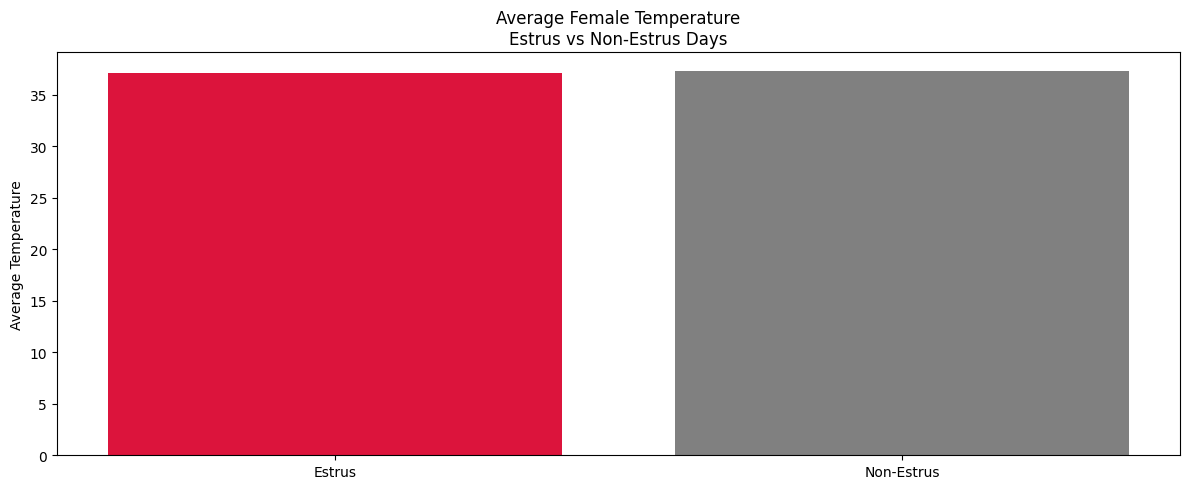

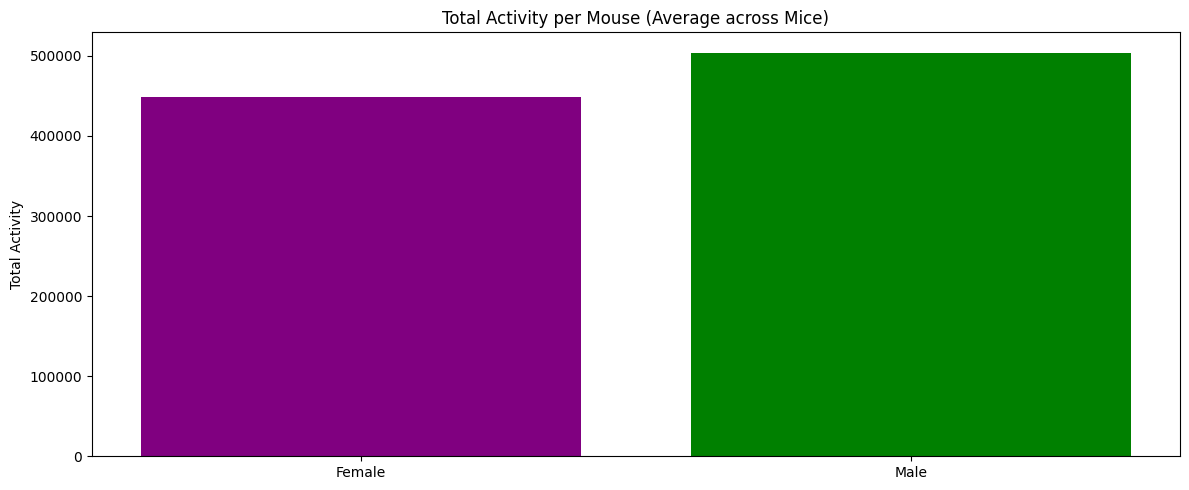

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (12, 5)

### 1. NEW: Total Activity Per Day (Female vs Male)
minutes_per_day = 1440
days = 14
fem_daily = [fem_act.iloc[i*minutes_per_day:(i+1)*minutes_per_day].sum().mean() for i in range(days)]
male_daily = [male_act.iloc[i*minutes_per_day:(i+1)*minutes_per_day].sum().mean() for i in range(days)]

plt.plot(range(1, 15), fem_daily, label="Female", marker='o')
plt.plot(range(1, 15), male_daily, label="Male", marker='x')
plt.title("Average Total Activity per Day")
plt.xlabel("Day")
plt.ylabel("Mean Total Activity")
plt.xticks(range(1, 15))
plt.legend()
plt.tight_layout()
plt.show()

### 2. Mean Temperature per Minute
plt.plot(fem_temp.mean(axis=1), label="Female", alpha=0.8)
plt.plot(male_temp.mean(axis=1), label="Male", alpha=0.8)
plt.title("Mean Temperature per Minute Over 14 Days")
plt.xlabel("Time (minutes)")
plt.ylabel("Mean Temperature")
plt.legend()
plt.tight_layout()
plt.show()

### 3. Hourly Average Activity (collapsed over 14 days)
fem_hourly = fem_act.groupby(fem_act.index // 60).mean().mean(axis=1)
male_hourly = male_act.groupby(male_act.index // 60).mean().mean(axis=1)

plt.plot(fem_hourly[:24], label="Female", marker="o")
plt.plot(male_hourly[:24], label="Male", marker="x")
plt.title("Average Hourly Activity (Day Pattern)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Activity")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

### 4. NEW: Average Activity Per Female Mouse
fem_per_mouse_avg = fem_act.mean()
plt.bar(fem_per_mouse_avg.index, fem_per_mouse_avg.values, color='indigo')
plt.title("Average Activity per Female Mouse")
plt.xlabel("Mouse ID")
plt.ylabel("Mean Activity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Avg Temperature on Estrus vs Non-Estrus Days
estrus_days = [2, 6, 10]
estrus_idx = []
for day in estrus_days:
    start = day * minutes_per_day
    estrus_idx.extend(range(start, start + minutes_per_day))
non_estrus_idx = list(set(range(14 * minutes_per_day)) - set(estrus_idx))

avg_temp_estrus = fem_temp.loc[estrus_idx].mean().mean()
avg_temp_non_estrus = fem_temp.loc[non_estrus_idx].mean().mean()

plt.bar(["Estrus", "Non-Estrus"], [avg_temp_estrus, avg_temp_non_estrus], color=["crimson", "gray"])
plt.title("Average Female Temperature\nEstrus vs Non-Estrus Days")
plt.ylabel("Average Temperature")
plt.tight_layout()
plt.show()

### 6. Total Activity Comparison: Female vs Male
total_fem_act = fem_act.sum().mean()
total_male_act = male_act.sum().mean()

plt.bar(["Female", "Male"], [total_fem_act, total_male_act], color=["purple", "green"])
plt.title("Total Activity per Mouse (Average across Mice)")
plt.ylabel("Total Activity")
plt.tight_layout()
plt.show()

